In [2]:
import sys
import os
from pathlib import Path

# Add the project root to Python path
cwd = os.getcwd()
print(cwd)
project_root = Path(cwd).parent  # Go up to project root
# Sys.path is a list of dirs that python searches through for importing modules and files
# I'm adding the root to the path so the file can import things as if it were running from root
# This way I can keep my tests organized, but it still acts like I'm running from root
sys.path.insert(0, str(project_root))

import jsbgym
from jsbgym.control_system.ha_flight_evals import *
from jsbgym.control_system.ha_flight_pid import HAPIDControlSubsystem, FGAPControlSubsystem

d:\1DrvTK\OneDrive\GitHub\ADMBenchmark\control_system_evaluations


In [3]:
basic_flight_evaluator = HAFlightControlEval()
alt_cases = list(AltCase)
hdg_cases = list(HdgCase)
wind_cases = [WindCase.CLM]
basic_flight_evaluator.batch_test(alt_cases,
hdg_cases,
wind_cases,
FGAPControlSubsystem(),
2
)

=== CASE ALTITUDE: AltCase.ALT_HOLD HEADING: HdgCase.HDG_HOLD WIND: WindCase.CLM ===
--> EXAMPLE 0
Running simulation for 450.0 steps
Engines set to running!
Average steady state error:120.75885005400413
Time to first conatact: 0.2
--> EXAMPLE 1
Running simulation for 450.0 steps
Engines set to running!
Average steady state error:120.75885005400413
Time to first conatact: 0.2
=== CASE ALTITUDE: AltCase.ALT_HOLD HEADING: HdgCase.HDG_L_45 WIND: WindCase.CLM ===
--> EXAMPLE 0
Running simulation for 518.1379577298875 steps
Engines set to running!
Average steady state error:116.90248350418659
Time to first conatact: 7.8
--> EXAMPLE 1
Running simulation for 476.7743941031344 steps
Engines set to running!
Average steady state error:120.13731525034743
Time to first conatact: 4.0
=== CASE ALTITUDE: AltCase.ALT_HOLD HEADING: HdgCase.HDG_45_90 WIND: WindCase.CLM ===
--> EXAMPLE 0
Running simulation for 610.3492392431444 steps
Engines set to running!
Average steady state error:94.77382438682301
Ti

In [4]:
# Get batch evaluations
print(basic_flight_evaluator.create_batch_eval(list(range(len(basic_flight_evaluator.cases)))))

{'max alt overshoot': 152.5963302339951, 'max alt avg steady state error': 120.75885005400413, 'avg alt steady state error': 59.32491296182894, 'avg max alt overshoot': 50.91521405850788, 'avg hdg steady state error': 0.37798913347798624, 'max hdg overshoot': 8.186048685062048, 'avg time fufillment': 1.1134997272239693, 'mean abs alt steady state error': 30.697126278606635}


In [5]:
indxs, criteria = basic_flight_evaluator.sort_evals()

In [6]:
print(indxs)
print(f"number of evals done: {len(indxs)}")
# Sanity check that it is sorted on the criteria correctly
print("Stall/Overspeed, SS error, max alt overshoot, exceeded expected time to first contact, max load factor")
for idx, c in enumerate(criteria):
    case_type = basic_flight_evaluator.cases[indxs[idx]]
    print(f"{case_type} : {c} : index {indxs[idx]}")


[13, 12, 11, 9, 10, 8, 2, 45, 42, 37, 36, 35, 34, 33, 32, 5, 4, 3, 1, 0, 23, 15, 14, 22, 21, 20, 19, 18, 17, 16, 53, 51, 49, 38, 7, 47, 46, 44, 43, 41, 40, 39, 6, 31, 30, 29, 28, 27, 25, 24, 26, 55, 54, 52, 50, 48]
number of evals done: 56
Stall/Overspeed, SS error, max alt overshoot, exceeded expected time to first contact, max load factor
(<AltCase.CLB_L_200: 'climb less than 200 ft'>, <HdgCase.HDG_45_90: 'change heading between 45 and 90 degrees'>, <WindCase.CLM: 'No Winds'>) : (0, 100, 150, 1, 2.0) : index 13
(<AltCase.CLB_L_200: 'climb less than 200 ft'>, <HdgCase.HDG_45_90: 'change heading between 45 and 90 degrees'>, <WindCase.CLM: 'No Winds'>) : (0, 100, 150, 1, 2.0) : index 12
(<AltCase.CLB_L_200: 'climb less than 200 ft'>, <HdgCase.HDG_L_45: 'change heading by less than 45 degrees'>, <WindCase.CLM: 'No Winds'>) : (0, 100, 150, 1, 2.0) : index 11
(<AltCase.CLB_L_200: 'climb less than 200 ft'>, <HdgCase.HDG_HOLD: 'hold heading'>, <WindCase.CLM: 'No Winds'>) : (0, 100, 150, 1, 2

{'atmosphere/psiw-rad': 5.898634017141172, 'atmosphere/wind-mag-fps': 0, 'ic/h-sl-ft': 5000, 'ic/psi-true-deg': 0, 'ic/u-fps': 168.78, 'altitude change desired': 2353.5851378227435, 'heading change desired': 44.06633185102463}
{'max alt overshoot': 52.06088348377125, 'max hdg overshoot': 6.364605060105234, 'max load factor': 1.94300918373353, 'avg load factor': 0.9972881246609265, 'min airspeed': 84.47744940463281, 'max airspeed': 106.03363782065921, 'avg airspeed': 97.05650600411676, 'avg alt steady state error': 1.4287654106819274, 'avg hdg steady state error': 0.08424234892204907, 'time to first contact s': 190.8, 'max man time mins': 7.060755413468231, 'max time mins': 8.56075541346823}


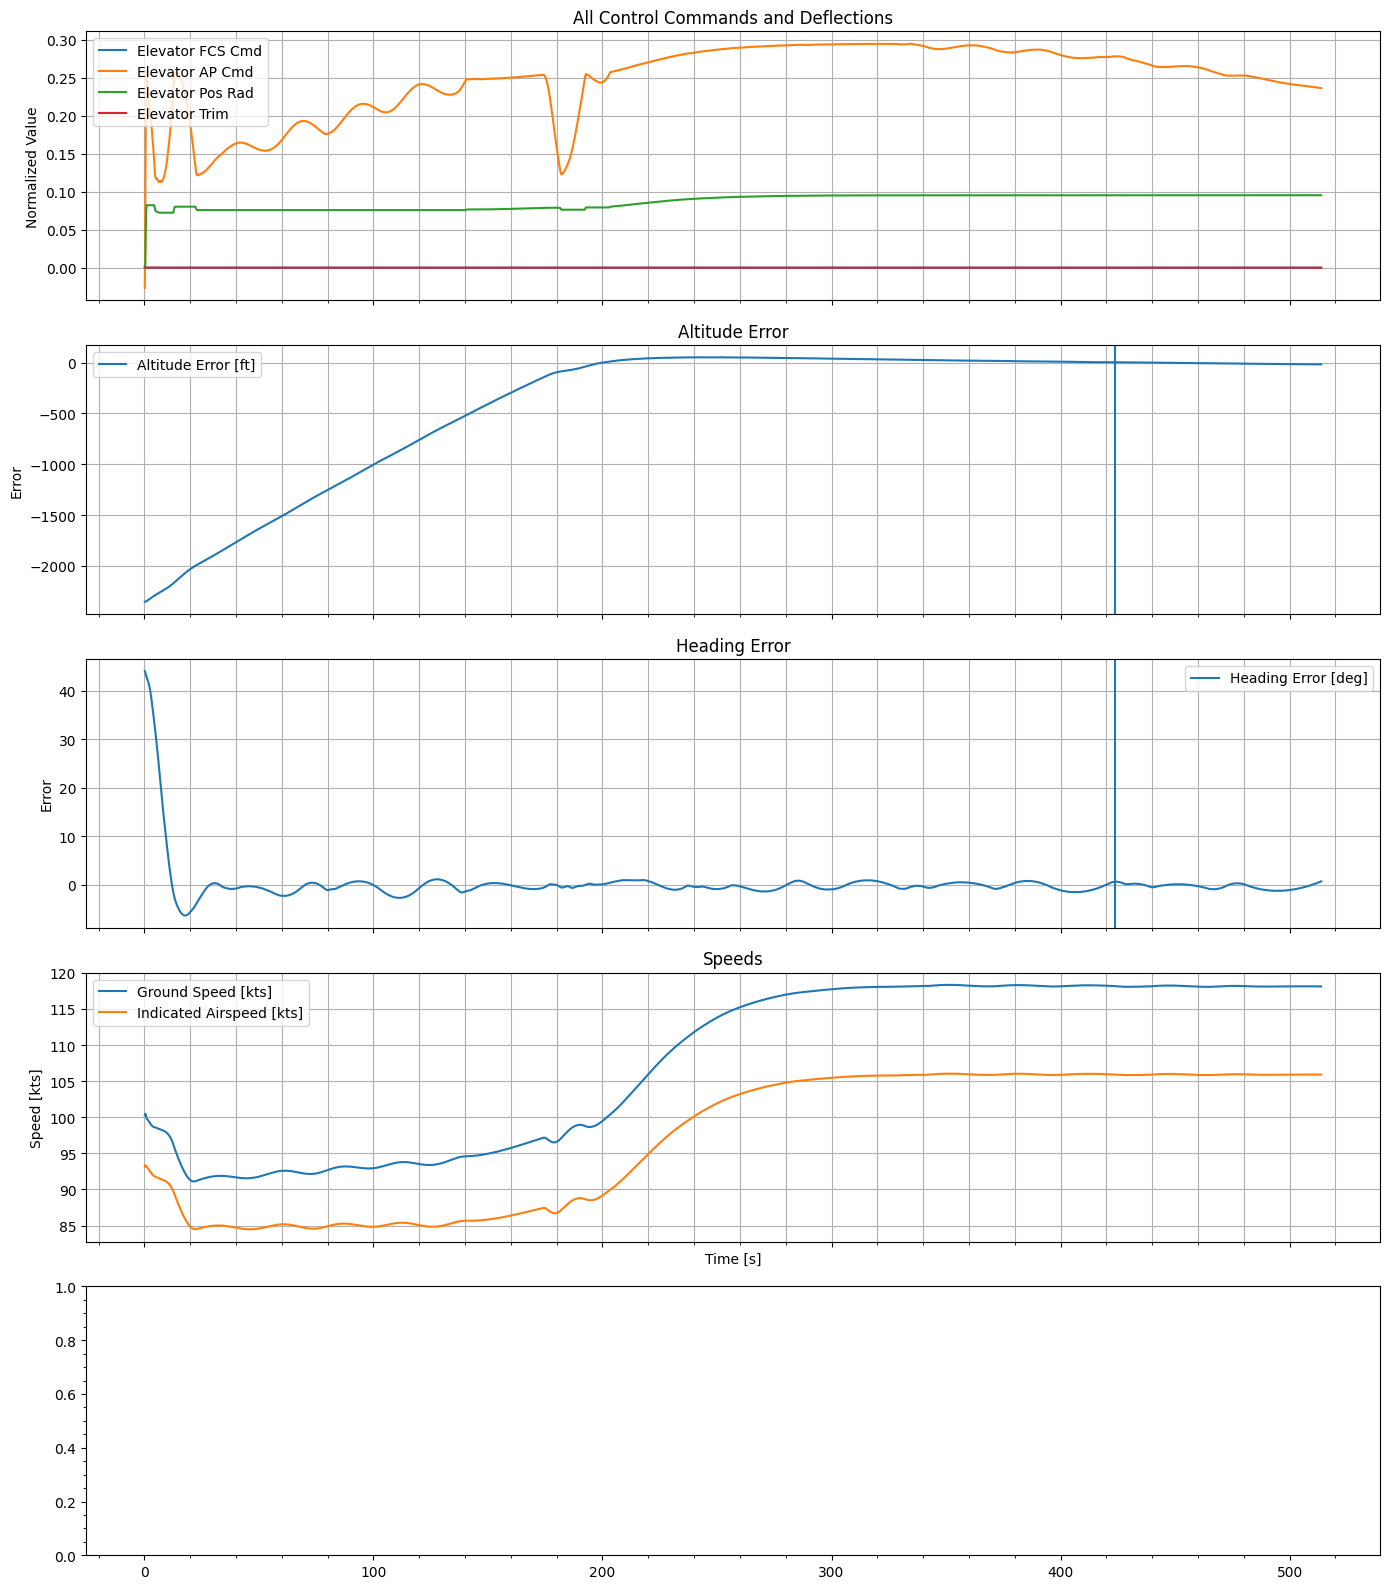

In [7]:
# Get the trajectory data and precise evaluation for an individual index for analysis
selected_index = 26
print(basic_flight_evaluator.initial_conditions[selected_index])
eval = basic_flight_evaluator.evals[selected_index]
print(eval)
basic_flight_evaluator.plot_eval(selected_index)

In [ ]:
# Run a single simulation from initial conditions
basic_flight_evaluator.run_single_eval(AltCase.ALT_HOLD, HdgCase.HDG_HOLD, HAPIDControlSubsystem(), "flightgear")